## Data inspection

This notebook's only goal is to give some idea what our images look like.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as imgg
import os
import pandas as pd
import numpy as np

from PIL import Image
from PIL import ImageDraw

### VisDrone data

We have created some auxiliary functions to be able to visualize annotations too.

In [17]:
class_={
    0: 'ignored regions',
    1: 'pedestrian',
    2: 'people',
    3: 'bicycle',
    4: 'car',
    5: 'van',
    6: 'truck',
    7: 'tricycle',
    8: 'awning-tricycle',
    9: 'bus',
    10: 'motor', 
    11: 'others'
}

In [18]:
def read_annot(path='VisDrone2019-DET-train/annotations/0000002_00005_d_0000014.txt'):
    
    # process annotation files, return pandas dataframe
    
    annot=pd.read_csv(path,header=None)
    annot.columns=['x','y','w','h','conf','class','truncation','occlusion']
    
    annot['x_']=annot['x']+annot['w']
    annot['y_']=annot['y']+annot['h']
    
    return annot

In [19]:
def draw_boxes(image,boxes):
    
    # draw all given boxes onto image
    # boxes is list of tuples of (x,y,x_,y_)
    
    rec=Image.new('RGBA',image.size,(255,255,255,0))
    draw=ImageDraw.Draw(rec)
    
    for box in boxes: 
        draw.rectangle(box,outline=(255,255,0)) # yellow outline
        
    out=Image.alpha_composite(image.convert('RGBA'),rec)
    
    return out

In [20]:
def resized_box(image,box,new_size=(128,128),as_numpy=True):
    
    # from box, crop image and resize to desired size: for testing classifiers on the data
    # box is tuple of (x,y,x_,y_)
    
    box_=image.crop(box)
    box_=box_.resize(new_size)
    
    if as_numpy:
        return np.array(box_)
    else:
        return box_
    

#### Demo, using VisDrone trainset

get from https://github.com/VisDrone/VisDrone-Dataset

In [21]:
im=Image.open('VisDrone2019-DET-train/images/0000002_00005_d_0000014.jpg')


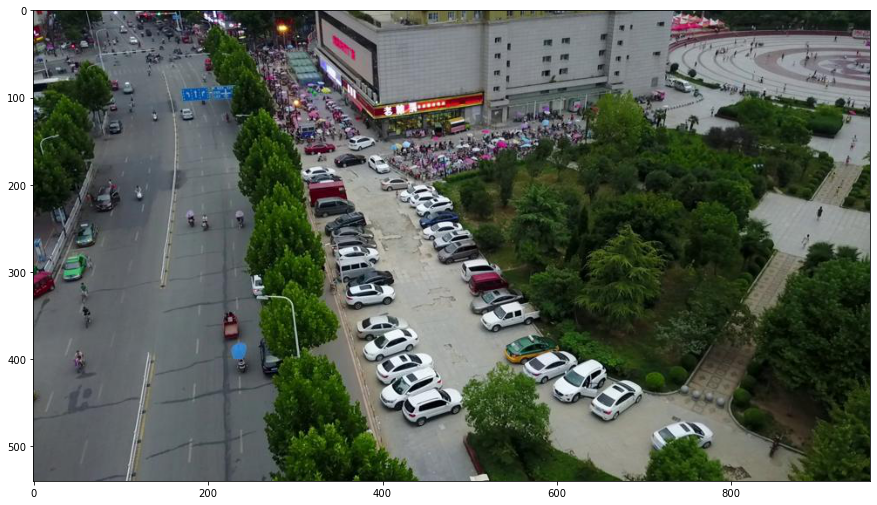

In [26]:
#original image
plt.figure(figsize=(15,15))
plt.imshow(np.asarray(im))

In [22]:
#read annotations
annot=read_annot('VisDrone2019-DET-train/annotations/0000002_00005_d_0000014.txt')
annot.head()

x    y    w    h  conf  class  truncation  occlusion   x_   y_
0  684    8  273  116     0      0           0          0  957  124
1  406  119  265   70     0      0           0          0  671  189
2  255   22  119  128     0      0           0          0  374  150
3    1    3  209   78     0      0           0          0  210   81
4  708  471   74   33     1      4           0          1  782  504

Collect all boxes from picture

In [23]:
l=[]
for i in range(annot.shape[0]):
    l.append(tuple(annot[['x','y','x_','y_']].iloc[i]))

In [24]:
boxed=draw_boxes(im,l)

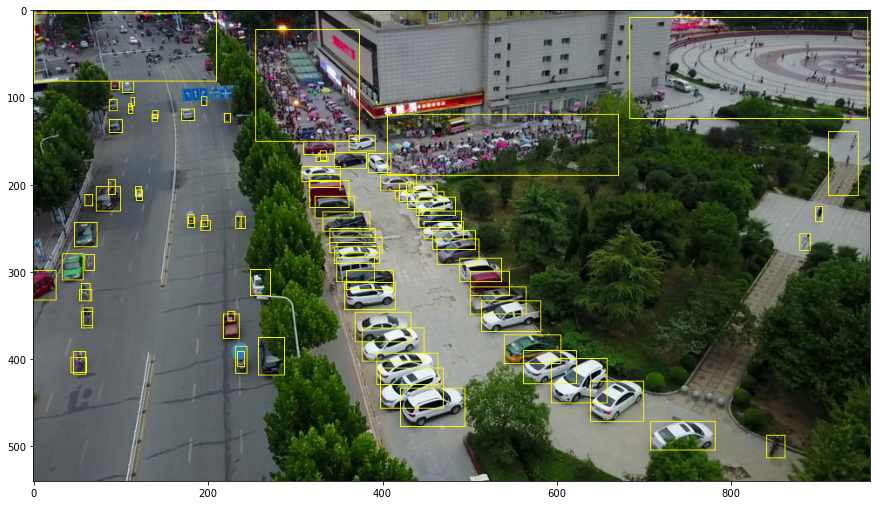

In [25]:
# all boxes
plt.figure(figsize=(15,15))
plt.imshow(np.asarray(boxed))

In [27]:
cars=[]
crs=annot[annot['class']==4]
for i in range(crs.shape[0]):
    cars.append(tuple(crs[['x','y','x_','y_']].iloc[i]))
    

In [28]:
boxed_cars=draw_boxes(im,cars)


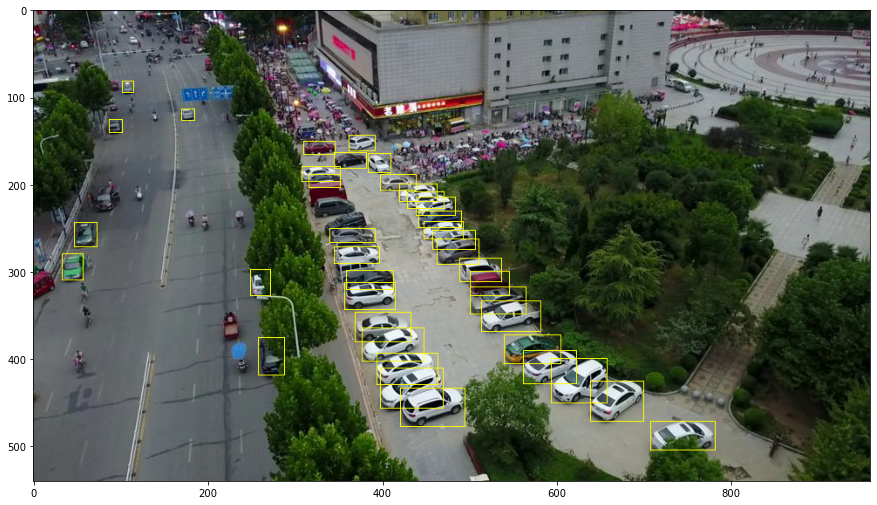

In [29]:
#only cars
plt.figure(figsize=(15,15))
plt.imshow(np.asarray(boxed_cars))

In [30]:
# randomly show 5 pictures
import random
impath='VisDrone2019-DET-train/images/'

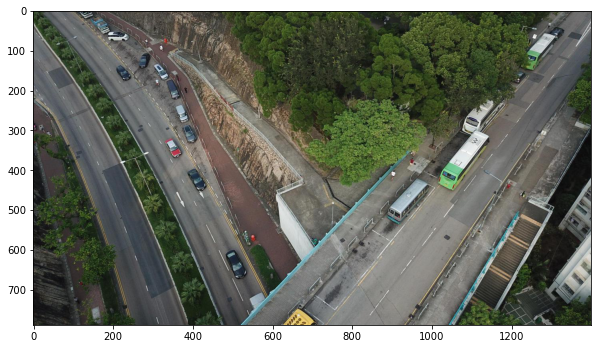

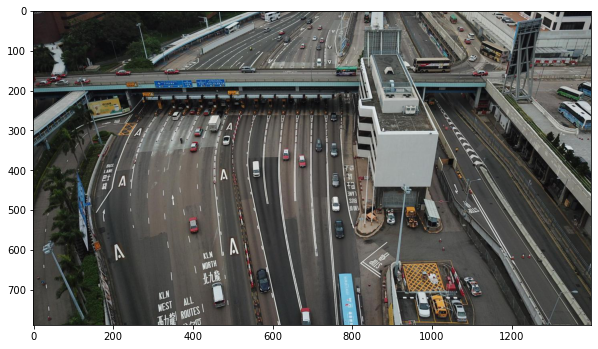

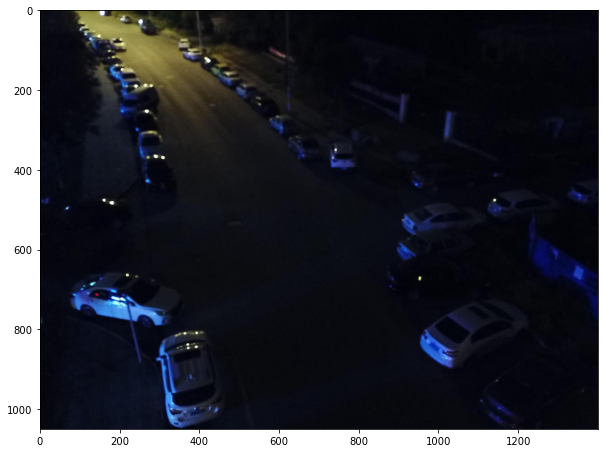

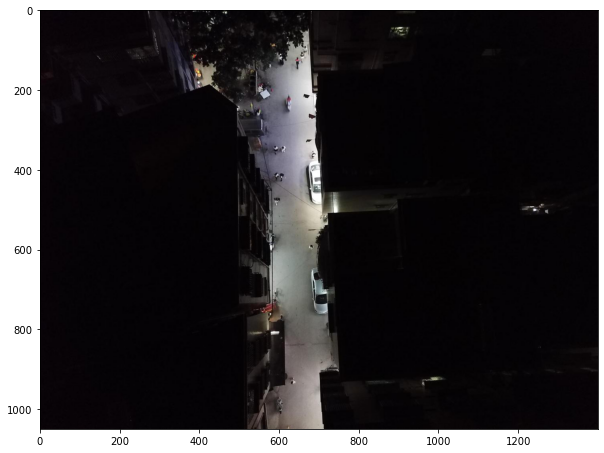

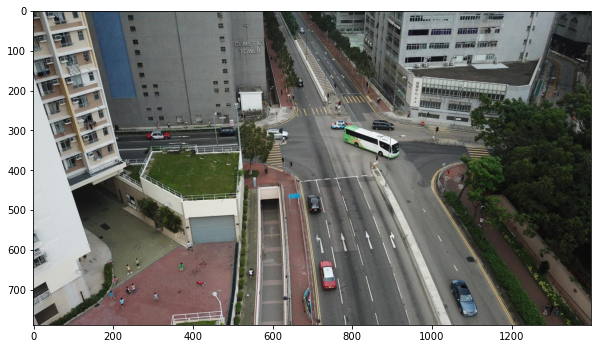

In [36]:
for i in range(5):
    im=Image.open(impath+random.choice(os.listdir(impath)))
    plt.figure(figsize=(10,10))
    plt.imshow(np.asarray(im))